In [295]:
from dataclasses import asdict, fields
from pathlib import Path
import pickle

import fsspec
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

from nas import _REPO_ROOT
from nas.benchmark.nats_bench import ArchitectureResult, Dataset, Metrics

## Set up

In [296]:
sns.set_theme()
sns.set_context("notebook")

In [297]:
TRACKING_URI = str(_REPO_ROOT / "results" / "mlruns")
TRACKING_URI

'/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns'

In [298]:
EXPERIMENT_NAME = "sa_cifar100_zero_temperature"

In [299]:
DATASET = Dataset.CIFAR100

In [300]:
FIGURES_DIR = _REPO_ROOT / "reports" / "figures" / EXPERIMENT_NAME
FIGURES_DIR.mkdir(exist_ok=True)

In [301]:
FIGURE_FORMAT = ".png"

In [302]:
def figure_path(name: str) -> Path:
    return (FIGURES_DIR / name).with_suffix(FIGURE_FORMAT)

## Load

In [303]:
client = mlflow.tracking.MlflowClient(tracking_uri=TRACKING_URI)
client

In [304]:
selected_experiment = client.search_experiments(
    filter_string=f"name = '{EXPERIMENT_NAME}'"
)[0]
selected_experiment

<Experiment: artifact_location='file:///home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns/387408793635766195', creation_time=1723454388053, experiment_id='387408793635766195', last_update_time=1723454388053, lifecycle_stage='active', name='sa_cifar100_zero_temperature', tags={}>

In [305]:
selected_runs = client.search_runs(selected_experiment.experiment_id)
len(selected_runs)

10

In [306]:
run_id_series = pd.Series(run.info.run_id for run in selected_runs)
run_id_series

0    7276c26b01644787aa4f8ae3fef2eb3f
1    76a266031ff64618a3051c9a8567379e
2    84b61789547044ddbd592c9819f9d224
3    f09681098ce646d997933509b311bee2
4    85403d32183747bf89cf393ec543c2f4
5    cab403eac2c34fb0b27bf0e134abd5cd
6    26cb62cac37d4e6f85a838ff30980387
7    096e8e15a5db4e7198f9a4f7e0ac1294
8    193b6f5eaea540648e14634018f4fdb7
9    c37a44faedf046d5b61d50a6f3700723
dtype: object

### Run metrics

In [307]:
run_df = pd.json_normalize([dict(run.data) for run in selected_runs])
run_df = run_df.set_index(run_id_series)
run_df

,metrics.final_val_time_per_epoch,metrics.final_test_loss,metrics.accuracy,metrics.final_test_accuracy,metrics.time,metrics.control_parameter,metrics.final_val_loss,metrics.loss,metrics.final_val_time,metrics.final_test_time,...,params.benchmark__path,params.optimiser__number_iterations,params.seed,params.optimiser__cooling_schedule__type,params.results_dir,tags.mlflow.source.git.commit,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.runName
7276c26b01644787aa4f8ae3fef2eb3f,0.683453,1.480014,58.96,58.34,8.201430,0.0,1.452520,1.452520,8.201430,8.201430,...,models/NATS-tss-v1_0-3ffb9-simple,300,9,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,agreeable-carp-663
76a266031ff64618a3051c9a8567379e,0.662917,1.415509,60.20,60.12,7.955008,0.0,1.411848,1.411848,7.955008,7.955008,...,models/NATS-tss-v1_0-3ffb9-simple,300,8,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,gaudy-roo-322
84b61789547044ddbd592c9819f9d224,0.822189,1.355012,61.32,61.04,9.866274,0.0,1.361083,1.361083,9.866274,9.866274,...,models/NATS-tss-v1_0-3ffb9-simple,300,7,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,masked-deer-343
f09681098ce646d997933509b311bee2,0.822189,1.355012,61.32,61.04,9.866274,0.0,1.361083,1.361083,9.866274,9.866274,...,models/NATS-tss-v1_0-3ffb9-simple,300,6,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,bright-asp-622
85403d32183747bf89cf393ec543c2f4,0.683453,1.480014,58.96,58.34,8.201430,0.0,1.452520,1.452520,8.201430,8.201430,...,models/NATS-tss-v1_0-3ffb9-simple,300,5,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,handsome-lamb-874
cab403eac2c34fb0b27bf0e134abd5cd,0.662917,1.415509,60.20,60.12,7.955008,0.0,1.411848,1.411848,7.955008,7.955008,...,models/NATS-tss-v1_0-3ffb9-simple,300,4,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,righteous-horse-844
26cb62cac37d4e6f85a838ff30980387,0.712373,1.424298,60.72,59.62,8.548475,0.0,1.401476,1.401476,8.548475,8.548475,...,models/NATS-tss-v1_0-3ffb9-simple,300,3,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,intrigued-conch-828
096e8e15a5db4e7198f9a4f7e0ac1294,0.822189,1.355012,61.32,61.04,9.866274,0.0,1.361083,1.361083,9.866274,9.866274,...,models/NATS-tss-v1_0-3ffb9-simple,300,2,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,crawling-newt-680
193b6f5eaea540648e14634018f4fdb7,0.642309,1.437558,59.90,59.12,7.707704,0.0,1.429224,1.429224,7.707704,7.707704,...,models/NATS-tss-v1_0-3ffb9-simple,300,1,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,crawling-vole-623
c37a44faedf046d5b61d50a6f3700723,0.811228,1.466571,59.96,58.42,9.734739,0.0,1.444479,1.444479,9.734739,9.734739,...,models/NATS-tss-v1_0-3ffb9-simple,300,0,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,placid-crane-87


In [308]:
run_df.columns

Index(['metrics.final_val_time_per_epoch', 'metrics.final_test_loss',
       'metrics.accuracy', 'metrics.final_test_accuracy', 'metrics.time',
       'metrics.control_parameter', 'metrics.final_val_loss', 'metrics.loss',
       'metrics.final_val_time', 'metrics.final_test_time',
       'metrics.final_val_accuracy', 'metrics.transition',
       'metrics.time_per_epoch', 'metrics.final_test_time_per_epoch',
       'params.optimiser__cooling_schedule__decay_rate',
       'params.optimiser__cooling_schedule__length', 'params.results_base_dir',
       'params.benchmark__name', 'params.benchmark__dataset',
       'params.optimiser__algorithm',
       'params.optimiser__cooling_schedule__initial', 'params.experiment_name',
       'params.benchmark__path', 'params.optimiser__number_iterations',
       'params.seed', 'params.optimiser__cooling_schedule__type',
       'params.results_dir', 'tags.mlflow.source.git.commit',
       'tags.mlflow.user', 'tags.mlflow.source.name',
       'tags.mlflo

### Run metric histories

In [309]:
fields(Metrics)

(Field(name='loss',type=float | None,default=<dataclasses._MISSING_TYPE object at 0x791a433694f0>,default_factory=<dataclasses._MISSING_TYPE object at 0x791a433694f0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='accuracy',type=float | None,default=<dataclasses._MISSING_TYPE object at 0x791a433694f0>,default_factory=<dataclasses._MISSING_TYPE object at 0x791a433694f0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='time_per_epoch',type=float | None,default=<dataclasses._MISSING_TYPE object at 0x791a433694f0>,default_factory=<dataclasses._MISSING_TYPE object at 0x791a433694f0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='time',type=float | None,default=<dataclasses._MISSING_TYPE object at 0x791a433694f0>,default_factory=<dataclasses._MISSING_TYPE object at 0x791a433694f0>,init=T

In [310]:
history_df_list = []
for run in selected_runs:
    run_history_df = pd.DataFrame({"step": []})
    for field in fields(Metrics):
        run_id = run.info.run_id
        history = client.get_metric_history(run_id, field.name)
        field_df = pd.DataFrame(dict(step) for step in history)
        field_df = field_df[["step", "value"]].rename(columns={"value": field.name})
        run_history_df = run_history_df.join(
            field_df,
            how="right",
            on="step",
            rsuffix="_r",
        ).drop(columns="step_r")
    run_history_df["run_id"] = run_id
    history_df_list.append(run_history_df)
history_df = pd.concat(history_df_list)
history_df

,step,loss,accuracy,time_per_epoch,time,run_id
0,0,1.570768,56.10,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
1,1,1.570768,56.10,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
2,2,1.570768,56.10,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
3,3,1.570768,56.10,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
4,4,1.570768,56.10,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
...,...,...,...,...,...,...
295,295,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723
296,296,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723
297,297,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723
298,298,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723


In [311]:
history_df["run_id"].isin(run_id_series).all()

True

### Run artifacts

Final `ArchitectureResult` objects are serialised and stored as artifacts

In [312]:
selected_runs[0].info.artifact_uri

'file:///home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns/387408793635766195/7276c26b01644787aa4f8ae3fef2eb3f/artifacts'

In [313]:
mlflow.artifacts.list_artifacts(
    selected_runs[0].info.artifact_uri, tracking_uri=TRACKING_URI
)

[<FileInfo: file_size=654, is_dir=False, path='artifacts/result.pkl'>]

In [314]:
run_results: list[ArchitectureResult] = []
for run in selected_runs:
    artifact_uri: str = run.info.artifact_uri
    with fsspec.open(Path(artifact_uri) / "result.pkl", "rb") as f:
        run_results.append(pickle.load(f))
run_results

[ArchitectureResult(index=11174, train=Metrics(loss=1.2498224237823485, accuracy=64.106, time_per_epoch=19.50717043876648, time=234.08604526519775), val=Metrics(loss=1.4525197629928588, accuracy=58.95999997558594, time_per_epoch=0.6834525352432613, time=8.201430422919136), test=Metrics(loss=1.48001369304657, accuracy=58.340000006103516, time_per_epoch=0.6834525352432613, time=8.201430422919136), flops=78.56778, size_parameters=0.565236, latency=0.013782262802124023),
 ArchitectureResult(index=8733, train=Metrics(loss=1.1956369148635864, accuracy=65.676, time_per_epoch=19.55589532852173, time=234.67074394226074), val=Metrics(loss=1.4118479831695556, accuracy=60.19999998779297, time_per_epoch=0.6629173074449812, time=7.955007689339775), test=Metrics(loss=1.4155094959259034, accuracy=60.119999987792966, time_per_epoch=0.6629173074449812, time=7.955007689339775), flops=113.95722, size_parameters=0.808276, latency=0.014896697468227811),
 ArchitectureResult(index=10165, train=Metrics(loss=1.

In [315]:
result_df = pd.json_normalize(asdict(result) for result in run_results)
result_df = result_df.set_index(run_id_series)
result_df

,index,flops,size_parameters,latency,train.loss,train.accuracy,train.time_per_epoch,train.time,val.loss,val.accuracy,...,test.loss,test.accuracy,test.time_per_epoch,test.time,architecture.edge_0_to_1,architecture.edge_0_to_2,architecture.edge_1_to_2,architecture.edge_0_to_3,architecture.edge_1_to_3,architecture.edge_2_to_3
7276c26b01644787aa4f8ae3fef2eb3f,11174,78.56778,0.565236,0.013782,1.249822,64.106,19.507170,234.086045,1.452520,58.96,...,1.480014,58.34,0.683453,8.201430,3,4,4,1,3,0
76a266031ff64618a3051c9a8567379e,8733,113.95722,0.808276,0.014897,1.195637,65.676,19.555895,234.670744,1.411848,60.20,...,1.415509,60.12,0.662917,7.955008,3,1,3,3,0,1
84b61789547044ddbd592c9819f9d224,10165,121.82154,0.864276,0.020235,1.102583,68.000,27.118598,325.423173,1.361083,61.32,...,1.355012,61.04,0.822189,9.866274,3,3,2,1,2,3
f09681098ce646d997933509b311bee2,10165,121.82154,0.864276,0.020235,1.102583,68.000,27.118598,325.423173,1.361083,61.32,...,1.355012,61.04,0.822189,9.866274,3,3,2,1,2,3
85403d32183747bf89cf393ec543c2f4,11174,78.56778,0.565236,0.013782,1.249822,64.106,19.507170,234.086045,1.452520,58.96,...,1.480014,58.34,0.683453,8.201430,3,4,4,1,3,0
cab403eac2c34fb0b27bf0e134abd5cd,8733,113.95722,0.808276,0.014897,1.195637,65.676,19.555895,234.670744,1.411848,60.20,...,1.415509,60.12,0.662917,7.955008,3,1,3,3,0,1
26cb62cac37d4e6f85a838ff30980387,13417,113.95722,0.808276,0.017772,1.155555,66.548,19.963830,239.565956,1.401476,60.72,...,1.424298,59.62,0.712373,8.548475,3,0,3,1,1,3
096e8e15a5db4e7198f9a4f7e0ac1294,10165,121.82154,0.864276,0.020235,1.102583,68.000,27.118598,325.423173,1.361083,61.32,...,1.355012,61.04,0.822189,9.866274,3,3,2,1,2,3
193b6f5eaea540648e14634018f4fdb7,15283,82.49994,0.593236,0.016749,1.228411,64.820,18.589616,223.075388,1.429224,59.90,...,1.437558,59.12,0.642309,7.707704,1,3,0,2,1,3
c37a44faedf046d5b61d50a6f3700723,13801,149.34666,1.051316,0.018413,1.223705,65.004,24.163116,289.957386,1.444479,59.96,...,1.466571,58.42,0.811228,9.734739,1,3,3,3,1,3


In [316]:
result_df.columns

Index(['index', 'flops', 'size_parameters', 'latency', 'train.loss',
       'train.accuracy', 'train.time_per_epoch', 'train.time', 'val.loss',
       'val.accuracy', 'val.time_per_epoch', 'val.time', 'test.loss',
       'test.accuracy', 'test.time_per_epoch', 'test.time',
       'architecture.edge_0_to_1', 'architecture.edge_0_to_2',
       'architecture.edge_1_to_2', 'architecture.edge_0_to_3',
       'architecture.edge_1_to_3', 'architecture.edge_2_to_3'],
      dtype='object')

## Analyse

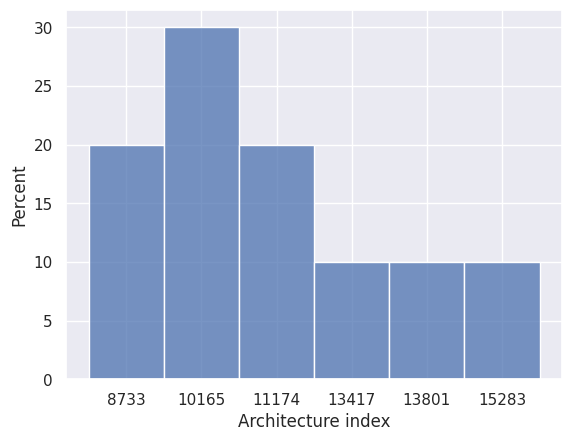

In [317]:
ax = sns.histplot(
    x=result_df["index"].sort_values().astype("str"),
    stat="percent",
)
ax.set(xlabel="Architecture index")
plt.savefig(figure_path("final_index_hist"))

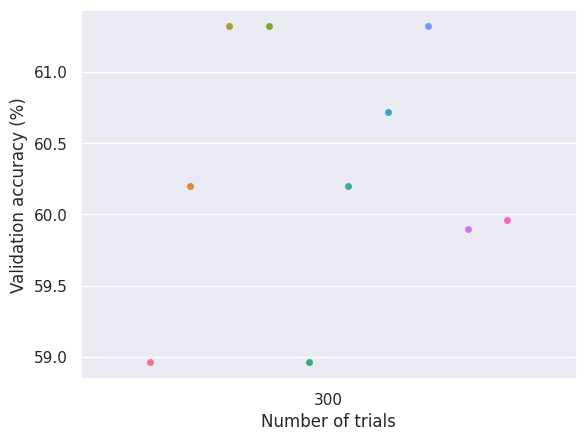

In [318]:
ax = sns.stripplot(
    result_df.join(run_df),
    x="params.optimiser__number_iterations",
    y="val.accuracy",
    hue="params.seed",
    palette="husl",
    dodge=True,
    jitter=False,
    legend=False,
)
ax.set(xlabel="Number of trials", ylabel="Validation accuracy (%)")
plt.savefig(figure_path("accuracy_number_trials"))

In [319]:
def plot_accuracy_subplots(column: str, xlabel: str | None = None):
    g = sns.catplot(
        result_df.join(run_df).rename(columns={column: "n"}),
        x="params.seed",
        y="val.accuracy",
        col="n",
        col_wrap=5,
        hue="params.seed",
        palette="husl",
        aspect=0.3,
        legend=False,
    )
    for ax in g.axes:
        ax.set(xlabel=xlabel, ylabel="Validation Accuracy (%)")
    return g

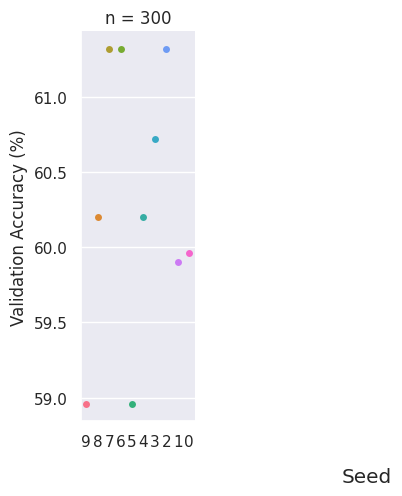

In [320]:
g = plot_accuracy_subplots("params.optimiser__number_iterations")
g.figure.supxlabel("Seed")
plt.savefig(figure_path("accuracy_number_trials_subplot"))

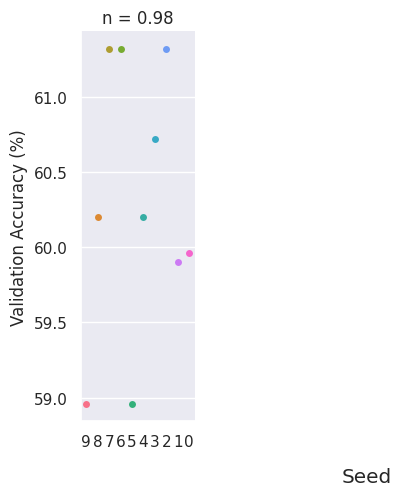

In [321]:
g = plot_accuracy_subplots("params.optimiser__cooling_schedule__decay_rate")
g.figure.supxlabel("Seed")
plt.savefig(figure_path("accuracy_decay_rate_subplot"))

In [322]:
OPTIMAL_ACCURACIES = {
    Dataset.CIFAR10: 84.89199999023438,
    Dataset.CIFAR100: 61.32,
    Dataset.IMAGENET: 38.66666662597656,
}

In [323]:
result_df["optimal"] = result_df["val.accuracy"].apply(
    lambda x: abs(x - OPTIMAL_ACCURACIES[DATASET]) < 1e-5
)
result_df["optimal"].mean()

0.3

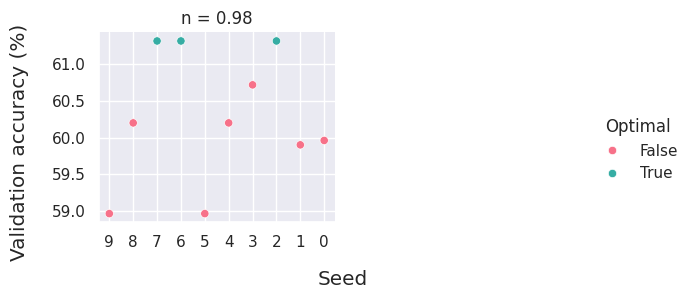

In [326]:
g = sns.FacetGrid(
    result_df.join(run_df).rename(
        columns={"params.optimiser__cooling_schedule__decay_rate": "n"}
    ),
    col="n",
    col_wrap=2,
    height=3,
)
g.map_dataframe(
    sns.scatterplot,
    x="params.seed",
    y="val.accuracy",
    hue="optimal",
    palette="husl",
)
g.add_legend(title="Optimal")
for ax in g.axes:
    ax.set(xlabel=None, ylabel=None)
g.figure.supxlabel("Seed")
g.figure.supylabel("Validation accuracy (%)")
plt.savefig(figure_path("optimal"))

Fabrizio's plot

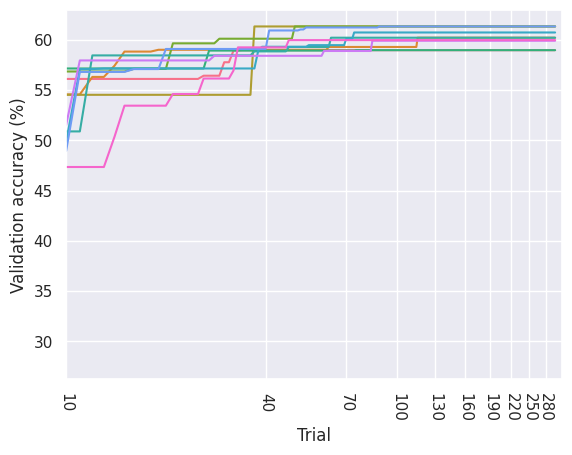

In [155]:
ax = sns.lineplot(
    history_df.merge(run_df["params.seed"], left_on="run_id", right_index=True),
    x="step",
    y="accuracy",
    hue="params.seed",
    palette="husl",
    legend=False,
)
ax.set(
    xlim=10,
    xscale="log",
    xticks=[i for i in range(10, history_df["step"].max(), 30)],
)
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.tick_params(axis="x", labelrotation=-90)
ax.set(xlabel="Trial", ylabel="Validation accuracy (%)")
plt.savefig(figure_path("history_log"))